#####Transfer learning and fine tuning


###Transfer learning

###Importing the libraries

In [1]:
import tensorflow as tf
import seaborn as sns
import zipfile
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
tf.__version__

'2.15.0'

###Loading the images

In [2]:
path = 'Computer_Vision_Masterclass_files\Datasets\homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

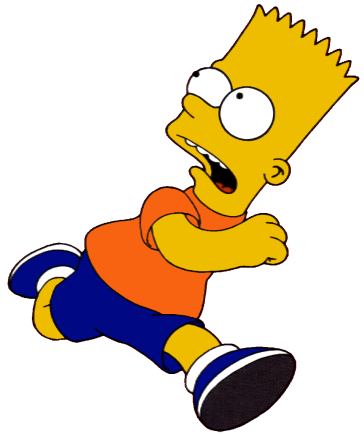

In [3]:
tf.keras.preprocessing.image.load_img('homer_bart_2/training_set/bart/bart100.bmp')

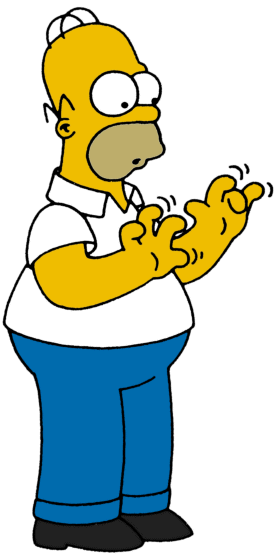

In [4]:
tf.keras.preprocessing.image.load_img('homer_bart_2/training_set/homer/homer100.bmp')

###Train and test set

In [5]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('homer_bart_2/training_set',
                                                        target_size = (256, 256),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 215 images belonging to 2 classes.


In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('homer_bart_2/test_set',
                                                     target_size = (256, 256),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


###Pre-trained network
ResNet: https://arxiv.org/pdf/1512.03385.pdf
Documentation: https://keras.io/api/applications/

In [9]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False,
                                            input_tensor = Input(shape = (256, 256, 3)))

In [10]:
base_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [11]:
len(base_model.layers)

175

In [12]:
for layer in base_model.layers:
  layer.trainable = False

In [13]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x0000025FEF05B580> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025FEF11D120> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF11D300> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025FEF11DF90> False
<keras.src.layers.core.activation.Activation object at 0x0000025FEF11EC80> False
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025FEF11F160> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000025FEF2FC280> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF2FE1A0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025FEF2FDFF0> False
<keras.src.layers.core.activation.Activation object at 0x0000025FEF2FFD60> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF2FF4C0> False
<keras.src.layers.normaliz

###Custom dense layer

In [14]:
base_model.output

<KerasTensor: shape=(None, 8, 8, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [15]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 1025, activation='relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(units = 1025, activation='relu')(head_model)
head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(2, activation='softmax')(head_model)

###Building and training the neural network

In [16]:
base_model.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>

In [17]:
network = Model(inputs = base_model.input, outputs = head_model)

In [18]:
8 * 8 * 2048

131072

In [19]:
(2048 + 2) / 2

1025.0

In [20]:
network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [21]:
network.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = network.fit(train_dataset, epochs=50)

Epoch 1/50


27/27 [==============================] - 28s 872ms/step - loss: 1.5211 - accuracy: 0.4791
Epoch 2/50
27/27 [==============================] - 23s 847ms/step - loss: 0.7041 - accuracy: 0.5535
Epoch 3/50
27/27 [==============================] - 23s 830ms/step - loss: 0.6888 - accuracy: 0.6047
Epoch 4/50
27/27 [==============================] - 24s 866ms/step - loss: 0.6523 - accuracy: 0.6000
Epoch 5/50
27/27 [==============================] - 23s 831ms/step - loss: 0.6725 - accuracy: 0.5907
Epoch 6/50
27/27 [==============================] - 23s 827ms/step - loss: 0.6424 - accuracy: 0.6279
Epoch 7/50
27/27 [==============================] - 25s 941ms/step - loss: 0.6245 - accuracy: 0.6558
Epoch 8/50
27/27 [==============================] - 24s 865ms/step - loss: 0.5527 - accuracy: 0.7256
Epoch 9/50
27/27 [==============================] - 23s 856ms/step - loss: 0.5796 - accuracy: 0.7116
Epoch 10/50
27/27 [==============================] - 23s 851ms/step - loss: 0.5175 - accu

###Evaluating the neural network

In [23]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [24]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 11s 172ms/step


array([[0.8886097 , 0.11139026],
       [0.8016825 , 0.19831753],
       [0.5975592 , 0.40244076],
       [0.92578936, 0.07421067],
       [0.9329801 , 0.06701993],
       [0.8839153 , 0.11608469],
       [0.11182756, 0.8881725 ],
       [0.70065635, 0.2993437 ],
       [0.7090372 , 0.29096285],
       [0.8162465 , 0.18375348],
       [0.39900726, 0.6009928 ],
       [0.95513296, 0.04486703],
       [0.8780565 , 0.12194351],
       [0.7775045 , 0.22249548],
       [0.8363444 , 0.16365558],
       [0.9415385 , 0.05846152],
       [0.6641304 , 0.33586964],
       [0.67882425, 0.32117575],
       [0.920781  , 0.07921899],
       [0.8616684 , 0.13833162],
       [0.7223973 , 0.2776026 ],
       [0.8750327 , 0.12496732],
       [0.9974648 , 0.00253521],
       [0.8377237 , 0.16227633],
       [0.9337086 , 0.0662914 ],
       [0.804222  , 0.19577801],
       [0.9668014 , 0.03319857],
       [0.8990016 , 0.10099845],
       [0.38311446, 0.61688554],
       [0.49460277, 0.50539726],
       [0.

In [25]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [26]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
# Approach 1 (all pixels): 0.68
# Approach 2 (features): 0.88
# Approach 3 (CNN): 0.92
# Approach 4 (Transfer learning): 0.81
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8148148148148148

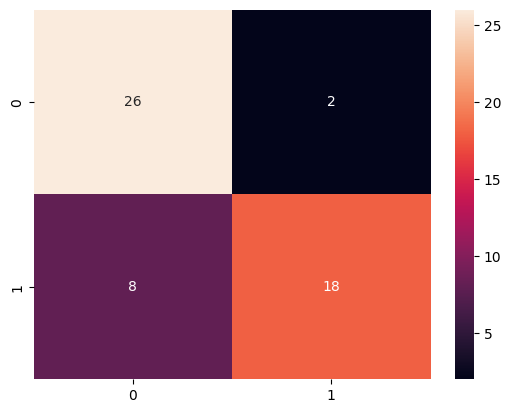

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True);

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        28
           1       0.90      0.69      0.78        26

    accuracy                           0.81        54
   macro avg       0.83      0.81      0.81        54
weighted avg       0.83      0.81      0.81        54



#####Fine tuning

###Implementing

In [30]:
base_model.trainable = True

In [31]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x0000025FEF05B580> True
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025FEF11D120> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF11D300> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025FEF11DF90> True
<keras.src.layers.core.activation.Activation object at 0x0000025FEF11EC80> True
<keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x0000025FEF11F160> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x0000025FEF2FC280> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF2FE1A0> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x0000025FEF2FDFF0> True
<keras.src.layers.core.activation.Activation object at 0x0000025FEF2FFD60> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x0000025FEF2FF4C0> True
<keras.src.layers.normalization.batch

In [32]:
len(base_model.layers)

175

In [33]:
fine_tuning_at = 140

In [34]:
for layer in base_model.layers[:fine_tuning_at]:
  layer.trainable = False

In [35]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = network.fit(train_dataset, epochs=50)

Epoch 1/50
27/27 [==============================] - 45s 1s/step - loss: 1.6334 - accuracy: 0.5628
Epoch 2/50
27/27 [==============================] - 38s 1s/step - loss: 0.6409 - accuracy: 0.6465
Epoch 3/50
27/27 [==============================] - 38s 1s/step - loss: 0.6971 - accuracy: 0.6698
Epoch 4/50
27/27 [==============================] - 38s 1s/step - loss: 0.5967 - accuracy: 0.6837
Epoch 5/50
27/27 [==============================] - 38s 1s/step - loss: 0.5139 - accuracy: 0.7581
Epoch 6/50
27/27 [==============================] - 38s 1s/step - loss: 0.4423 - accuracy: 0.8047
Epoch 7/50
27/27 [==============================] - 38s 1s/step - loss: 0.6074 - accuracy: 0.7442
Epoch 8/50
27/27 [==============================] - 37s 1s/step - loss: 0.5245 - accuracy: 0.6884
Epoch 9/50
27/27 [==============================] - 38s 1s/step - loss: 0.4295 - accuracy: 0.7814
Epoch 10/50
27/27 [==============================] - 37s 1s/step - loss: 0.4229 - accuracy: 0.7907
Epoch 11/50
27/27 [

###Evaluate

In [44]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 9s 157ms/step


array([[9.9997783e-01, 2.2190396e-05],
       [9.9999607e-01, 3.9224674e-06],
       [7.7184959e-05, 9.9992275e-01],
       [1.0000000e+00, 2.7651870e-09],
       [9.9739158e-01, 2.6084078e-03],
       [1.0000000e+00, 6.9527792e-09],
       [9.7309756e-01, 2.6902458e-02],
       [9.7143418e-01, 2.8565859e-02],
       [9.9999762e-01, 2.3904399e-06],
       [2.2736907e-03, 9.9772626e-01],
       [1.4023384e-04, 9.9985969e-01],
       [9.9994934e-01, 5.0615643e-05],
       [9.9999988e-01, 1.4614639e-07],
       [7.5760670e-02, 9.2423934e-01],
       [1.6598104e-02, 9.8340189e-01],
       [9.9999666e-01, 3.3197625e-06],
       [9.9999702e-01, 2.9237337e-06],
       [9.9999988e-01, 7.6279569e-08],
       [1.0000000e+00, 2.5219129e-09],
       [1.0000000e+00, 1.8276634e-16],
       [9.4548635e-02, 9.0545130e-01],
       [9.7779959e-01, 2.2200396e-02],
       [9.9996543e-01, 3.4600216e-05],
       [9.9493802e-01, 5.0620013e-03],
       [9.9999738e-01, 2.5733480e-06],
       [9.9956304e-01, 4.

In [45]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [46]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
# Approach 1 (all pixels): 0.68
# Approach 2 (features): 0.88
# Approach 3 (CNN): 0.92
# Approach 4 (Transfer learning): 0.81
# Approach 4 (Fine tuning): 0.85
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8518518518518519

###Saving and loading the model

In [48]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [49]:
from keras.models import save_model
network_saved = save_model(network, 'weights.hdf5')

C:\Users\User\AppData\Local\Temp\ipykernel_26636\2957579276.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, 'weights.hdf5')


In [50]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Functional", "config": {"name": "model", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 256, 256, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "registered_name": null, "name": "input_1", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": false, "dtype": "float32", "padding": [[3, 3], [3, 3]], "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 256, 256, 3]}, "name": "conv1_pad", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv1_conv", "trainable": false, "dtype": "float32", "filters": 64, "kernel_size": [7, 7], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initia

In [51]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [52]:
network_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

###Classifying one single image

In [53]:
image = cv2.imread('homer_bart_2/test_set/homer/homer15.bmp')

In [54]:
#To Display image
if image is not None:
    # Display the image
    cv2.imshow('image', image)

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to read the image.")

In [55]:
image = cv2.resize(image, (256, 256))
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [57]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [58]:
image.shape

(256, 256, 3)

In [59]:
image = image.reshape(-1, 256, 256, 3)
image.shape

(1, 256, 256, 3)

In [60]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.03517732, 0.96482265]], dtype=float32)>

In [61]:
result = np.argmax(result)
result

1

In [62]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [63]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
